## 1단계 : 라이브러리 import

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 2단계 : Data Load

In [14]:
# mnist의 fashion datasets 객체를 불러옴
fashion_mnist = tf.keras.datasets.fashion_mnist
# 데이터 로드해서 언패킹
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터셋에 클래스 이름이 들어있지 않기 때문에, 별도의 변수로 저장
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Avkle boot']

## 3단계 : 데이터 형식 확인

In [15]:
# train datasets
print(train_images.shape)
print(len(train_labels))
print(train_labels)

# test datasets
print(test_images.shape)
print(len(test_images))
print(test_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


## 4단계 : 이미지 확인

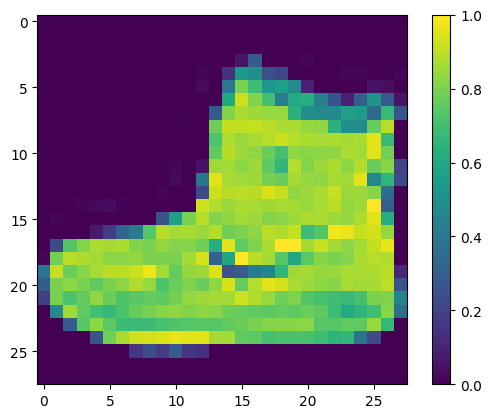

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 새 그래프 공간을 생성
plt.figure()
# 이미지를 그림
plt.imshow(train_images[0])
# 컬러 스케일바를 표시함
plt.colorbar()
# grid 옵션 False (grid가 없어야 잘 보이니까)
plt.grid(False)
# 이미지 표시
plt.show()


## 5단계 : 이미지 전처리 후 비교

학습에 용이하도록 0~255의 범위를 0~1로 줄임

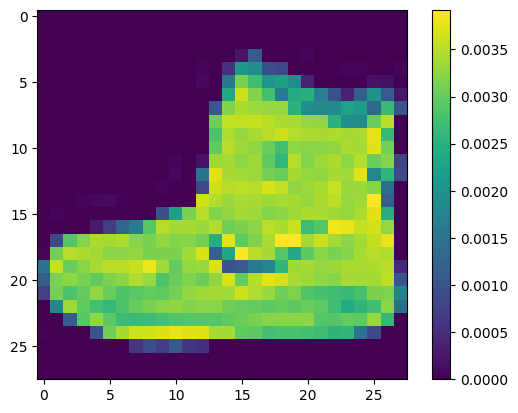

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 비교를 위해 이미지를 띄움
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 6단계 : Model 생성

In [18]:
model = tf.keras.Sequential([
    # 28*28
	tf.keras.layers.Flatten(input_shape=(28,28)),
	tf.keras.layers.Dense(32, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1758158053.671928   12725 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## 7단계 : Model 컴파일

In [20]:
model.compile(
	optimizer='adam',
 # 이 손실함수는 정답 데이터가 정수형이어야 함
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 # 학습 중에 관찰할 지표는 정확도
	metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## 8단계 : Model 학습

In [21]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5913 - loss: 1.3858
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7359 - loss: 0.7876
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7608 - loss: 0.6709
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7776 - loss: 0.6191
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7905 - loss: 0.5843
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8006 - loss: 0.5578
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8102 - loss: 0.5364
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8161 - loss: 0.5190
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8221 - loss: 0.5043
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8259 - loss: 0.4919


## 9단계 : Model 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
# verbose : 출력(로그)를 어떻게 보여줄 건지 결정
	# 0 : none
	# 1 : test 진행 중 step마다 progress bar 출력
	# 2 : 전체 평가 결과를 한 줄로 출력

print("\nTest accuracy", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8190 - loss: 0.5145

Test accuracy 0.8190000057220459


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,352 (298.25 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,902 (198.84 KB)

## 10단계 : 모델 활용

In [27]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[4.4076404e-07 2.4846614e-09 6.7983119e-06 1.9184188e-06 2.9492705e-06
 1.2421315e-01 6.4580322e-06 4.1027817e-01 4.9821069e-03 4.6050799e-01]


확률의 합이 1인지 확인  
(부동소수점 오차때문에 정확히 1은 안 나옴)

In [30]:
sum = 0
for p in predictions[0]:
    sum += p    
print(sum)

1.0


In [34]:
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

9
Avkle boot


## 11단계 : 모델 활용 2

In [38]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(f"{format(class_names[predicted_label])} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

In [39]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

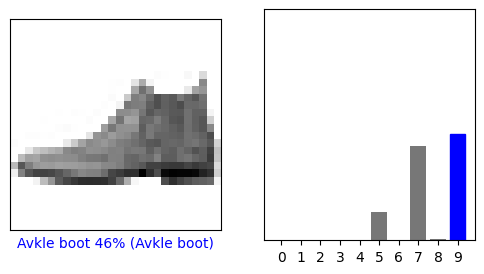

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

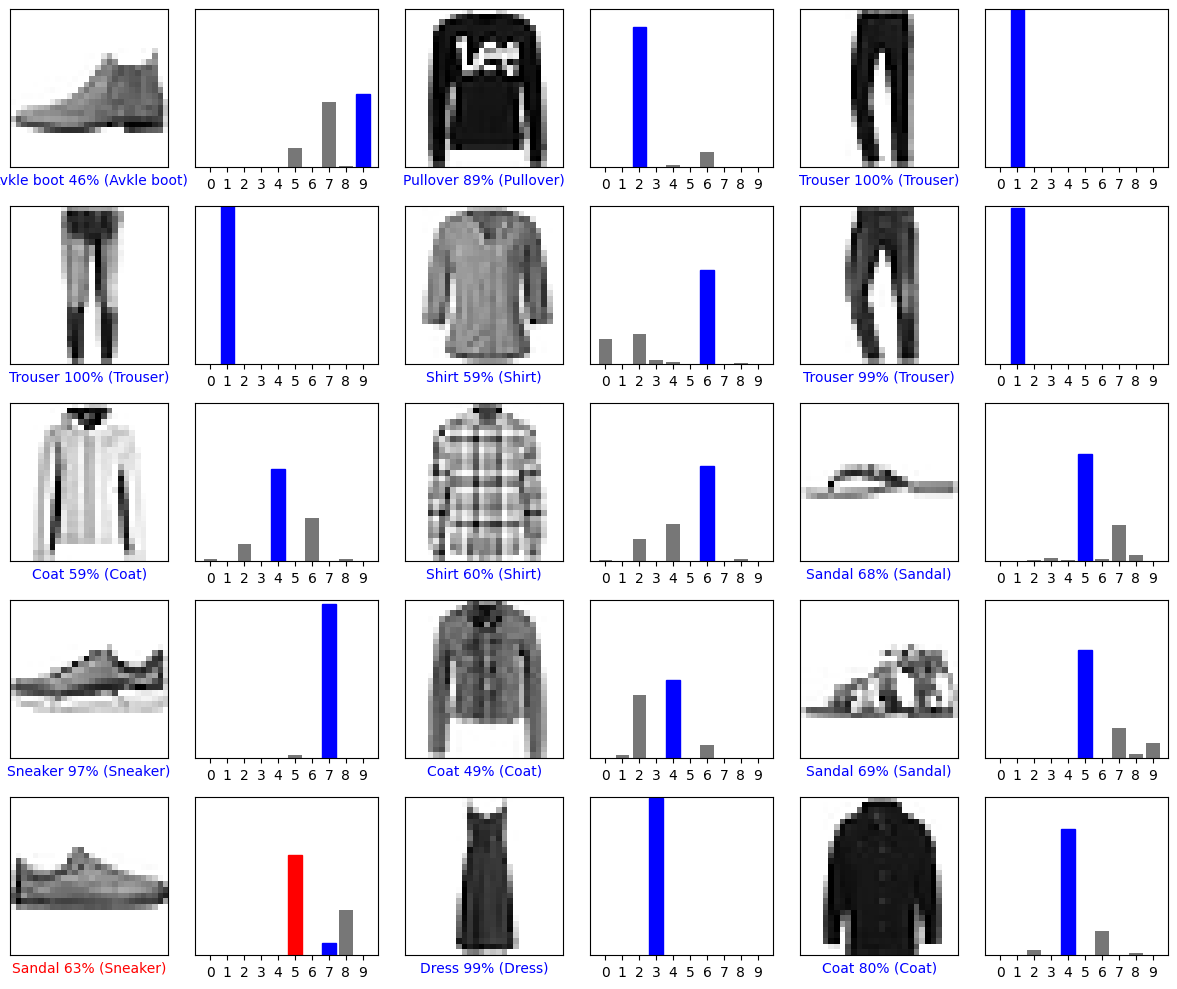

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()